Do something like:
https://www.researchgate.net/figure/mage-of-Abraham-Lincoln-as-a-matrix-of-pixel-values_fig1_330902210

Load number from mnist dataset as example

Alternative: https://www.researchgate.net/figure/Digitization-and-pixel-values-of-an-image-Image-Pixels-2019_fig1_338332295

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import rasterio
from rasterio.plot import show
from pathlib import Path

In [2]:
image_path = r'C:\Users\Fabian\Documents\Masterarbeit_Daten\API_test\T32UNA_20230208T103211_TCI_10m.jp2'
image = rasterio.open(image_path)

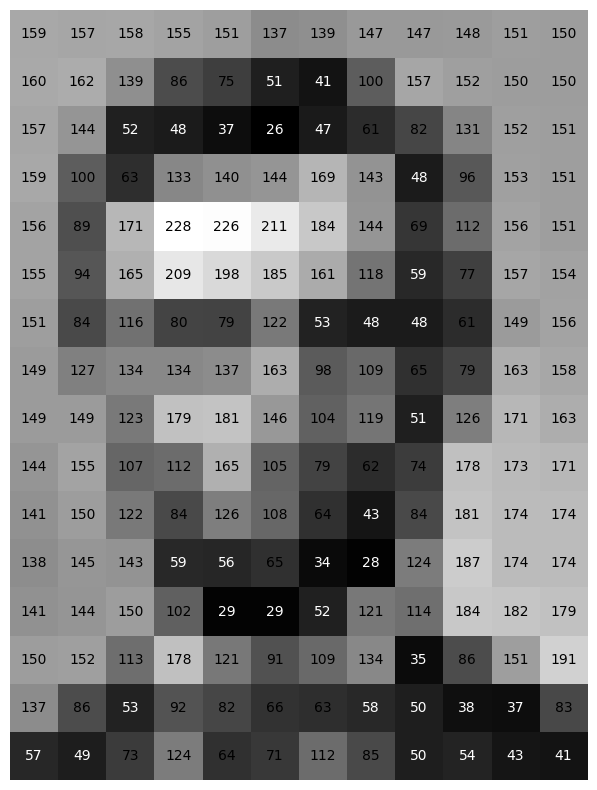

In [32]:
img = Image.open("372px-Abraham_Lincoln_O-77_matte_collodion_print.jpg")
img = img.convert('L')
img.thumbnail((20, 20))
img_matrix = np.array(img)
img_matrix = img_matrix [:-4, 2:-2]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_matrix , cmap='gray')
for i in range(img_matrix.shape[0]):
    for j in range(img_matrix.shape[1]):
        if img_matrix [i, j] > 60:
            ax.annotate(str(img_matrix [i, j]), xy=(j, i), ha='center', va='center')
        else:
            ax.annotate(str(img_matrix [i, j]), xy=(j, i), ha='center', va='center', color='white')
ax.axis('off');

In [33]:
fig.savefig("Image_to_matrix.pdf", bbox_inches="tight")
fig.savefig("Image_to_matrix.svg", bbox_inches="tight")

### Show difference between Image Classification, Object detection, and Image Segmentation 

[CS231 Standfort](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture11.pdf) Page 17

In [3]:
root_path = Path(r'C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local')
filename = '32UMA_247_2018-9-27.tif'
image_path = root_path / 'images_undersampling' / filename
mask_path = root_path / 'masks_undersampling' / filename

In [4]:
image = rasterio.open(image_path).read()
mask = rasterio.open(mask_path).read()

In [5]:
img = image[1:4,:,:].transpose(1,2,0)

In [8]:
def show_rgb_sample(img, mask=None, ax=ax1,  show_mask=True, show_bbox=True, show_axis=False):
    ax.imshow(img)
    if show_mask:
        ax.imshow(mask.squeeze(), cmap='jet', alpha=0.5*(mask.squeeze()==True))
    if show_bbox:
        rect = patches.Rectangle((119, 105), 25, 65, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
    ax.set_xlim(85, 185)
    ax.set_ylim(85, 185)
    if not show_axis:
        ax.axis('off')

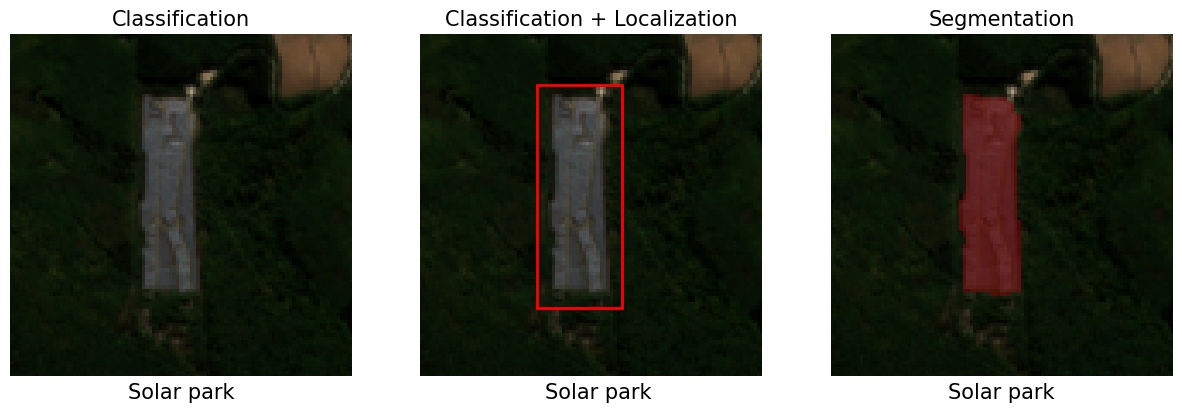

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
show_rgb_sample(img, mask, ax=ax1, show_mask=False, show_bbox=False, show_axis=False)
ax1.set_title('Classification', fontsize=15)
ax1.text(0.5, -0.05, 'Solar park', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=15)

show_rgb_sample(img, mask, ax=ax2, show_mask=False, show_bbox=True, show_axis=False)
ax2.set_title('Classification + Localization', fontsize=15)
ax2.text(1.72, -0.05, 'Solar park', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=15)

show_rgb_sample(img, mask, ax=ax3, show_mask=True, show_bbox=False, show_axis=False)
ax3.set_title('Segmentation', fontsize=15)
ax3.text(2.9, -0.05, 'Solar park', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=15);

In [26]:
fig.savefig("Classification_localization_segmentation_eng.pdf", bbox_inches="tight")
fig.savefig("Classification_localization_segmentation_eng.svg", bbox_inches="tight")

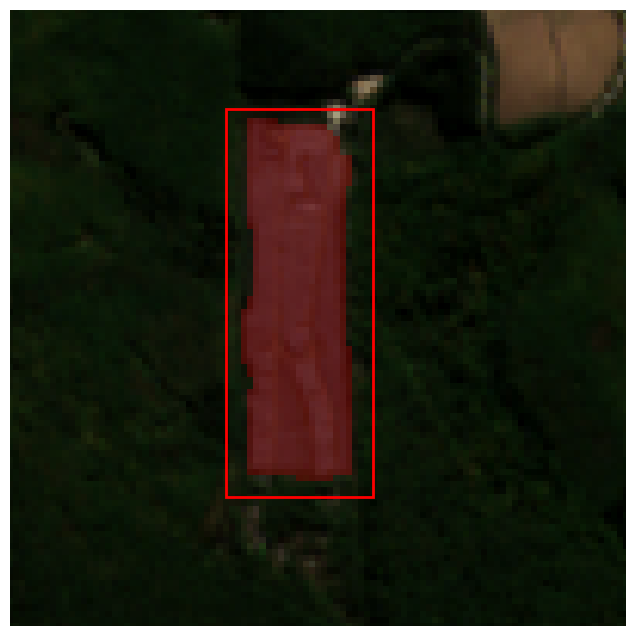

In [83]:
show_rgb_sample(image, mask)

### Create True Color Image (RGB) and False Color Image  (NIR, Red, Green)

In [120]:
root_path = Path(r'C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local')
filename = '32UMD_679_2018-7-27.tif'
image_path = root_path / 'images_undersampling' / filename

In [121]:
image = rasterio.open(image_path).read()

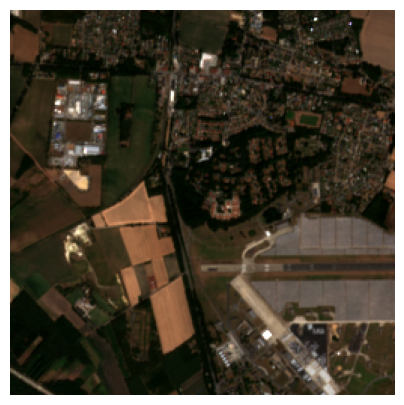

In [135]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
ax1.imshow(image[1:4,:,:].transpose(1,2,0))
ax1.axis('off');

In [134]:
fig.savefig("TCI_32UMD_679_2018-7-27.pdf", format="pdf", bbox_inches="tight")

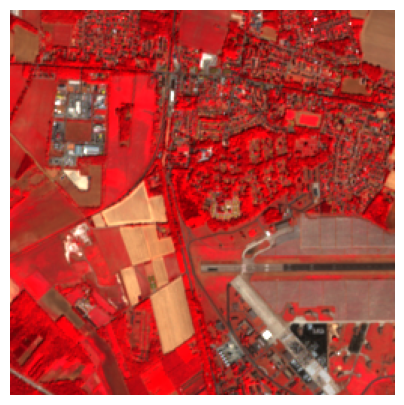

In [136]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
ax1.imshow(image[0:3,:,:].transpose(1,2,0))
ax1.axis('off');

In [131]:
fig.savefig("FCI_32UMD_679_2018-7-27.pdf", format="pdf", bbox_inches="tight")

### Show preprocessing steps

In [23]:
def robust_normalize(
    band: np.ndarray, lower_bound: int = 1, upper_bound: int = 99
) -> np.ndarray:
    # get lower bound percentile
    percentile_lower_bound = np.percentile(band, lower_bound)
    # set all lower bound outliers to percentile_lower_bound value
    band[band < percentile_lower_bound] = percentile_lower_bound
    # get upper bound percentile
    percentile_upper_bound = np.percentile(band, upper_bound)
    # set all upper bound outliers to percentile_upper_bound value
    band[band > percentile_upper_bound] = percentile_upper_bound
    # avoid division by zero
    if (percentile_upper_bound - percentile_lower_bound) == 0:
        return band
    # normalize
    return (band - percentile_lower_bound) / (
        percentile_upper_bound - percentile_lower_bound
    )

In [108]:
def color_correction(stacked_bands: np.ndarray) -> np.ndarray:
    """Perform color correction on the stacked bands array.

    Args:
        stacked_bands (np.ndarray): The stacked bands array.

    Returns:
        np.ndarray: The color-corrected stacked bands array.
    """
    # ToDo: try np.int16 instead of int
    return (stacked_bands / 8)

In [94]:
raw_image_dir = Path(r'C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local\raw_sentinel_download\S2A_MSIL2A_20230208T103211_N0509_R108_T32UNA_20230208T164302.SAFE\GRANULE\L2A_T32UNA_A039859_20230208T103552\IMG_DATA\R10m')

In [95]:
red_file_name = 'T32UNA_20230208T103211_B02_10m.jp2'
green_file_name = 'T32UNA_20230208T103211_B03_10m.jp2'
blue_file_name = 'T32UNA_20230208T103211_B04_10m.jp2'

In [96]:
red = rasterio.open(raw_image_dir/red_file_name).read(1)
green = rasterio.open(raw_image_dir/green_file_name).read(1)
blue = rasterio.open(raw_image_dir/blue_file_name).read(1)

In [97]:
stacked_bands = np.stack([blue, green, red])

In [73]:
stacked_bands.shape

(3, 10980, 10980)

In [98]:
example = stacked_bands[:, 5500:6000, 5500:6000]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


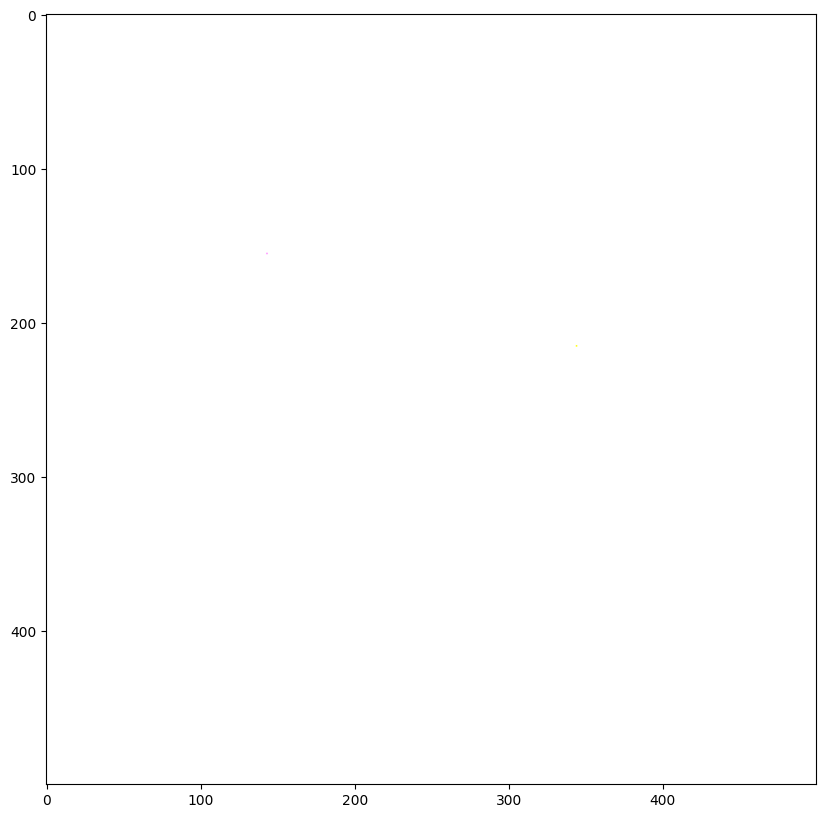

In [99]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
ax.imshow(example.transpose(1,2,0));

In [109]:
example_corrected = color_correction(example)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


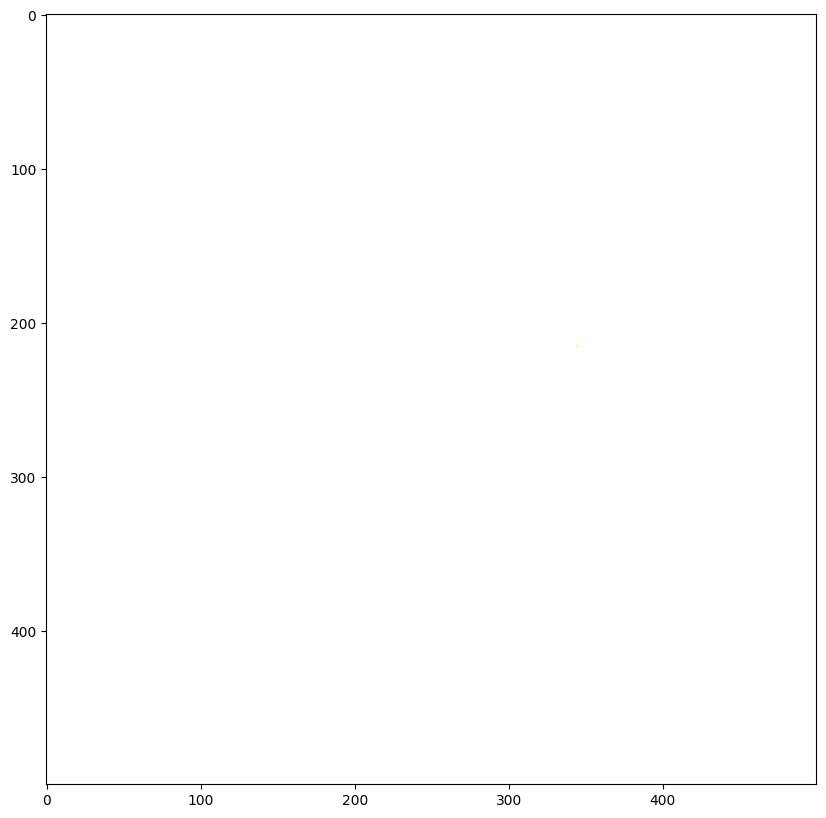

In [101]:
fig, ax1 = plt.subplots(1,1, figsize = (10, 10))
ax1.imshow(example_corrected.transpose(1,2,0))

In [110]:
example_corr_normalized = robust_normalize(example_corrected)

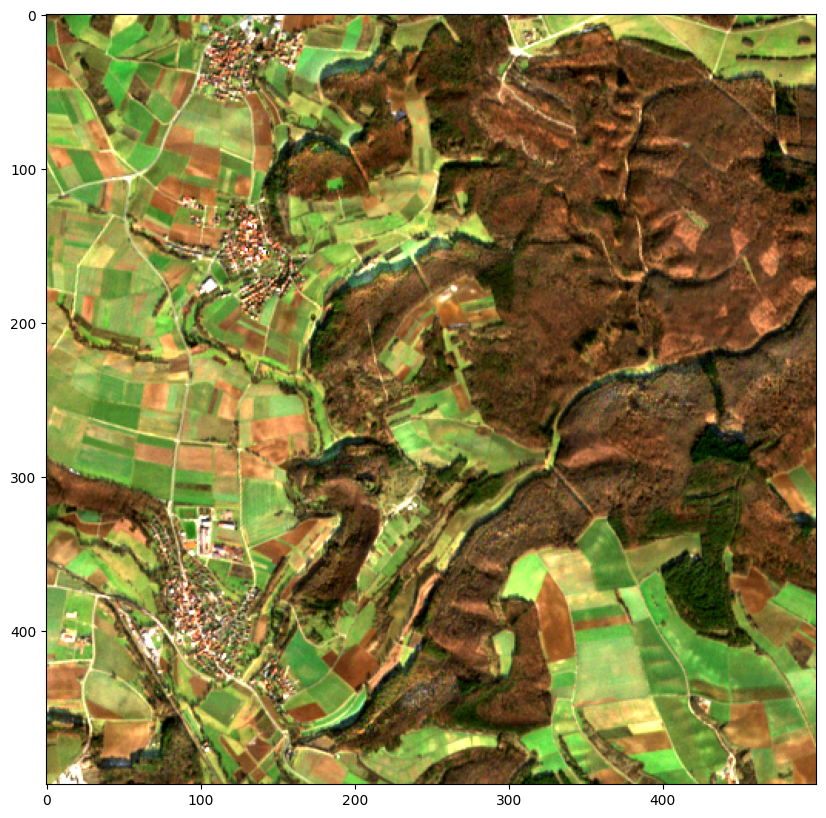

In [111]:
fig, ax1 = plt.subplots(1,1, figsize = (10, 10))
ax1.imshow(example_corr_normalized.transpose(1,2,0))

In [112]:
example_normalized = robust_normalize(example)

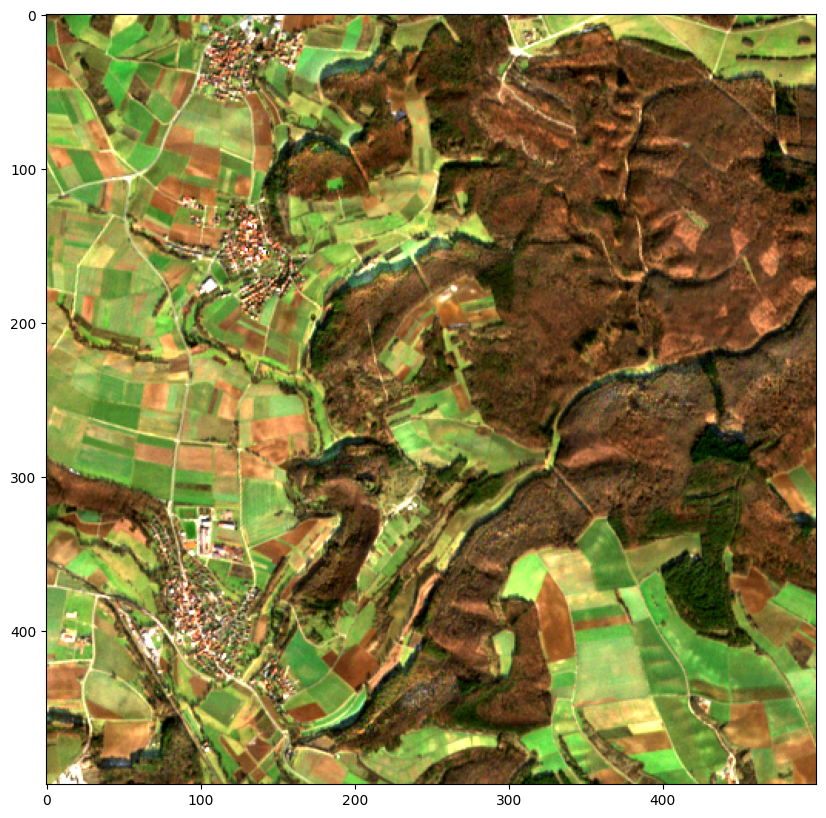

In [113]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
ax.imshow(example_normalized.transpose(1,2,0))

In [63]:
example_corr = color_correction(example_normalized)

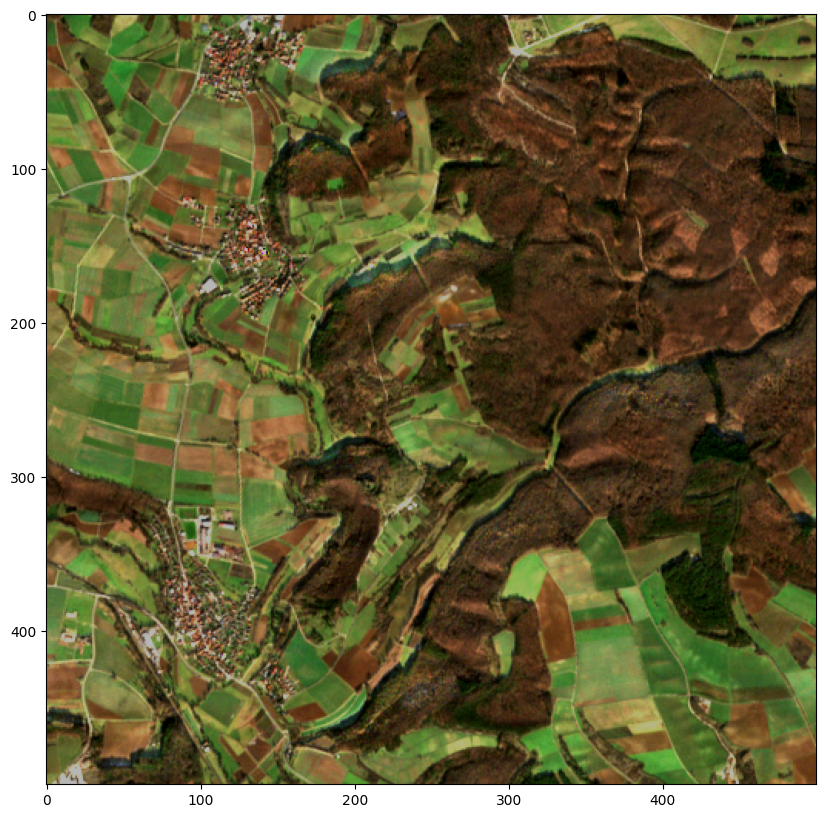

In [115]:
fig, ax1 = plt.subplots(1,1, figsize = (10, 10))
ax1.imshow((example_normalized/1.4).transpose(1,2,0))